--- INICIANDO ANÁLISE DE SECAGEM ---

[SUCESSO] Dados importados do arquivo 'dados_secagem.csv':
   Tempo (min)  Umidade (g/g)
0            0           2.50
1           10           1.85
2           20           1.35
3           30           0.98
4           40           0.71

Verificando a qualidade dos dados...
- Nenhum valor nulo encontrado.
- Nenhum dado duplicado encontrado.

Dados após cálculo da Razão de Umidade:
    Tempo (min)  Umidade (g/g)  Razao_Umidade
0             0           2.50       1.000000
1            10           1.85       0.729167
2            20           1.35       0.520833
3            30           0.98       0.366667
4            40           0.71       0.254167
5            50           0.52       0.175000
6            60           0.39       0.120833
7            70           0.28       0.075000
8            80           0.22       0.050000
9            90           0.17       0.029167
10          100           0.13       0.012500
11          110         

C:\Users\Pichau\AppData\Local\Temp\ipykernel_15372\3646144619.py:87: RuntimeWarning: divide by zero encountered in power
  return np.exp(-k * t**n)


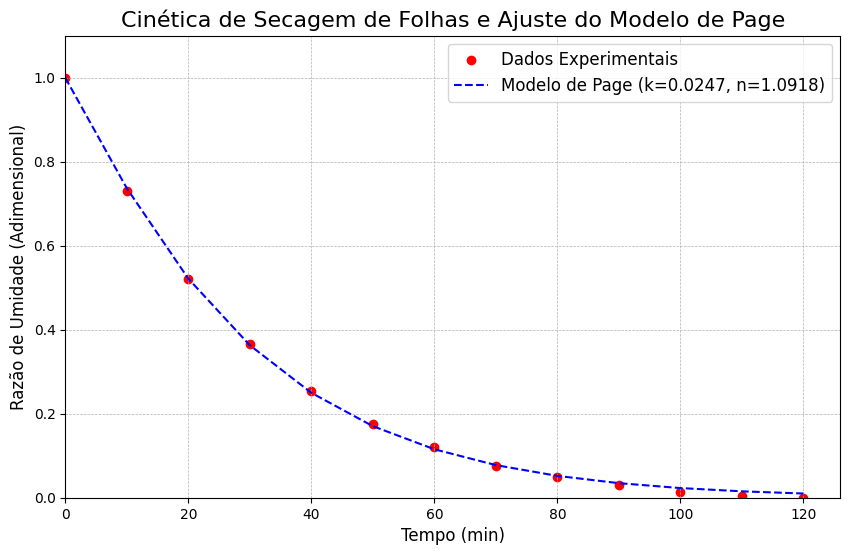


--- ANÁLISE CONCLUÍDA ---


In [1]:
# -----------------------------------------------------------------------------
# Introdução à Ciência de Dados com Python Aplicada à Eng. Agrícola
# Análise de um Experimento de Secagem de Folhas Medicinais
# -----------------------------------------------------------------------------

# Etapa 1: Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

print("--- INICIANDO ANÁLISE DE SECAGEM ---")

# -----------------------------------------------------------------------------
# Etapa 2: Carregamento e Limpeza dos Dados
# -----------------------------------------------------------------------------
# O script tentará carregar o arquivo .csv. Se não encontrar, mostrará um erro.
try:
    # Importando os dados do arquivo CSV para um DataFrame do Pandas
    dados = pd.read_csv('dados_secagem.csv')
    print("\n[SUCESSO] Dados importados do arquivo 'dados_secagem.csv':")
    print(dados.head()) # Mostra as 5 primeiras linhas
except FileNotFoundError:
    print("\n[ERRO] Arquivo 'dados_secagem.csv' não encontrado.")
    print("Por favor, certifique-se de que o arquivo está no mesmo diretório que o script.")
    exit()

# Verificação de limpeza de dados
print("\nVerificando a qualidade dos dados...")
# Checando se há valores nulos (NaN)
if dados.isnull().sum().sum() == 0:
    print("- Nenhum valor nulo encontrado.")
else:
    print("- Atenção: Valores nulos encontrados. Considere um método de tratamento (ex: preenchimento ou remoção).")
    print(dados.isnull().sum())

# Checando se há dados duplicados
if dados.duplicated().sum() == 0:
    print("- Nenhum dado duplicado encontrado.")
else:
    print("- Atenção: Linhas duplicadas encontradas. Considere removê-las.")

# -----------------------------------------------------------------------------
# Etapa 3: Análise e Preparação dos Dados
# -----------------------------------------------------------------------------
# Em estudos de secagem, é padrão trabalhar com a "Razão de Umidade" (RU).
# A fórmula é: RU = (U - Ue) / (Ui - Ue)
# Onde:
# U  = Umidade em um tempo t
# Ui = Umidade inicial (no tempo 0)
# Ue = Umidade de equilíbrio (umidade final, quando não há mais variação)

# Extraindo os valores do DataFrame
tempo = dados['Tempo (min)'].values
umidade = dados['Umidade (g/g)'].values

# Definindo a umidade inicial e de equilíbrio
umidade_inicial = umidade[0]
umidade_equilibrio = umidade[-1] # Usando o último valor medido como aproximação

# Calculando a Razão de Umidade
razao_umidade = (umidade - umidade_equilibrio) / (umidade_inicial - umidade_equilibrio)

# Adicionando a Razão de Umidade ao nosso DataFrame para análise
dados['Razao_Umidade'] = razao_umidade
print("\nDados após cálculo da Razão de Umidade:")
print(dados)

print("\nAnálise descritiva básica dos dados:")
print(dados.describe())

# -----------------------------------------------------------------------------
# Etapa 4: Ajuste de Modelo com SciPy
# -----------------------------------------------------------------------------
# Vamos ajustar o modelo de Page, muito utilizado em Engenharia Agrícola para
# descrever a cinética de secagem.
# A equação do modelo de Page é: RU = exp(-k * t^n)

# 1. Definir a função do modelo para o SciPy
def modelo_page(t, k, n):
    """
    Equação do modelo de Page para cinética de secagem.
    t: variável independente (tempo)
    k: constante de secagem
    n: parâmetro do modelo
    """
    return np.exp(-k * t**n)

# 2. Usar a função `curve_fit` do SciPy para encontrar os parâmetros k e n
# `curve_fit` usa um método de mínimos quadrados não-linear.
# Ele retorna:
# - popt: Array com os parâmetros otimizados (k e n, na ordem)
# - pcov: Matriz de covariância dos parâmetros
parametros_otimizados, matriz_covariancia = curve_fit(modelo_page, tempo, razao_umidade)

# 3. Extrair os parâmetros encontrados
k_ajustado = parametros_otimizados[0]
n_ajustado = parametros_otimizados[1]

print("\n--- RESULTADOS DO AJUSTE DO MODELO DE PAGE ---")
print(f"Parâmetro 'k' ajustado: {k_ajustado:.4f}")
print(f"Parâmetro 'n' ajustado: {n_ajustado:.4f}")

# -----------------------------------------------------------------------------
# Etapa 5: Visualização dos Resultados
# -----------------------------------------------------------------------------
# Vamos criar um gráfico que compara os dados experimentais (simulados)
# com a curva do modelo ajustado.

# Gerar os valores da curva do modelo com os parâmetros ajustados
razao_umidade_predita = modelo_page(tempo, k_ajustado, n_ajustado)

# Criar o gráfico
plt.figure(figsize=(10, 6)) # Define o tamanho da figura

# Plotar os dados experimentais como pontos (scatter plot)
plt.scatter(tempo, razao_umidade, color='red', label='Dados Experimentais')

# Plotar a curva do modelo ajustado como uma linha
plt.plot(tempo, razao_umidade_predita, color='blue', linestyle='--', label=f'Modelo de Page (k={k_ajustado:.4f}, n={n_ajustado:.4f})')

# Adicionar títulos e rótulos para clareza
plt.title('Cinética de Secagem de Folhas e Ajuste do Modelo de Page', fontsize=16)
plt.xlabel('Tempo (min)', fontsize=12)
plt.ylabel('Razão de Umidade (Adimensional)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 1.1) # Limite do eixo y para melhor visualização
plt.xlim(left=0) # Limite do eixo x para começar em 0

# Salvar o gráfico em um arquivo de imagem
plt.savefig('grafico_secagem_ajuste.png')

print("\n[SUCESSO] Gráfico 'grafico_secagem_ajuste.png' foi salvo no diretório.")

# Exibir o gráfico
plt.show()

print("\n--- ANÁLISE CONCLUÍDA ---")

Como Executar e Interpretar os Resultados  

Estrutura de Arquivos: Crie uma pasta para o seu projeto. Dentro dela, salve os dois arquivos:  
dados_secagem.csv  
analise_secagem.py

Execução no VSCode: Abra a pasta no VSCode. Abra um terminal (Terminal > Novo Terminal) e execute o script digitando:
python analise_secagem.py    

Resultados no Terminal: O script irá imprimir no terminal cada etapa do processo:  
a confirmação da importação dos dados,  
a verificação de limpeza,  
a tabela com a Razão de Umidade calculada e,  
o mais importante, os parâmetros k e n do modelo de Page que foram ajustados aos seus dados.

Visualização Gráfica: Ao final da execução, uma janela aparecerá mostrando o gráfico.  
Além disso, uma imagem chamada grafico_secagem_ajuste.png será salva na sua pasta.

Os pontos vermelhos são seus dados experimentais (simulados).  
A linha azul tracejada é a curva gerada pelo modelo de Page com os parâmetros k e n que o SciPy calculou.  
O quão bem a linha azul se ajusta aos pontos vermelhos indica a qualidade do ajuste do modelo.  
Como pode ver no gráfico gerado, o modelo de Page descreve muito bem o fenômeno da secagem para estes dados.

Este exercício prático cobre de forma robusta o ciclo de uma análise de dados em sua área de estudo. 